In [ ]:
import numpy as np
import pandas as pd

# Loading Data

input_file = 'C:/Users/hamdi/Desktop/hamdi-code/Training python/Competition_Dataset.csv'
data_police = pd.read_csv(input_file)

In [2]:
# Dimension 

data_police.shape

(680826, 9)

In [3]:
# Features

print (data_police.columns.values)

['Dates' 'Category' 'Descript' 'DayOfWeek' 'PdDistrict' 'Resolution'
 'Address' 'Latitude (Y)' 'Longitude (X)']


In [4]:
 # Verify null values

data_police.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 680826 entries, 0 to 680825
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Dates          680826 non-null  object 
 1   Category       680826 non-null  object 
 2   Descript       680826 non-null  object 
 3   DayOfWeek      680826 non-null  object 
 4   PdDistrict     680826 non-null  object 
 5   Resolution     680826 non-null  object 
 6   Address        680826 non-null  object 
 7   Latitude (Y)   680826 non-null  float64
 8   Longitude (X)  680826 non-null  float64
dtypes: float64(2), object(7)
memory usage: 46.7+ MB


In [5]:
# Verify data limits (initial)

data_police.describe()

,Latitude (Y),Longitude (X)
count,680826.000000,680826.000000
mean,-122.422852,37.771560
std,0.030744,0.470065
min,-122.513642,37.707879
25%,-122.433532,37.752837
50%,-122.416517,37.775421
75%,-122.406843,37.784464
max,-120.500000,90.000000


In [6]:
data_police.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,Latitude (Y),Longitude (X)
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [7]:
data_police.isnull().sum()

Dates            0
Category         0
Descript         0
DayOfWeek        0
PdDistrict       0
Resolution       0
Address          0
Latitude (Y)     0
Longitude (X)    0
dtype: int64

<AxesSubplot:xlabel='DayOfWeek'>

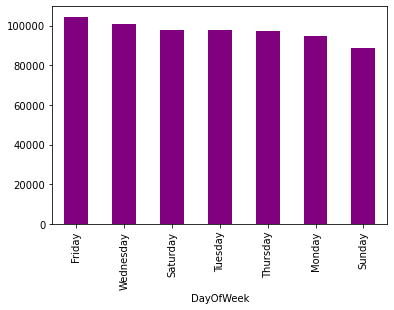

In [8]:
data_police['DayOfWeek'].value_counts().plot(kind='bar', color='purple')

In [9]:
print ("a")

a


In [10]:
data_police.Descript.describe()

count                           680826
unique                             609
top       GRAND THEFT FROM LOCKED AUTO
freq                             53984
Name: Descript, dtype: object

<AxesSubplot:xlabel='PdDistrict'>

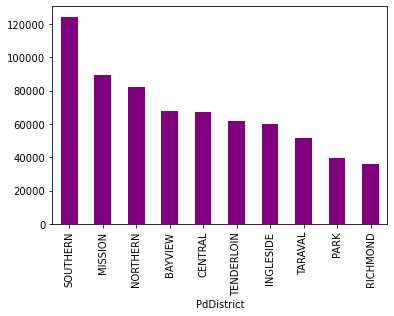

In [11]:
data_police['PdDistrict'].value_counts().plot(kind='bar', color='purple')

<AxesSubplot:xlabel='Category'>

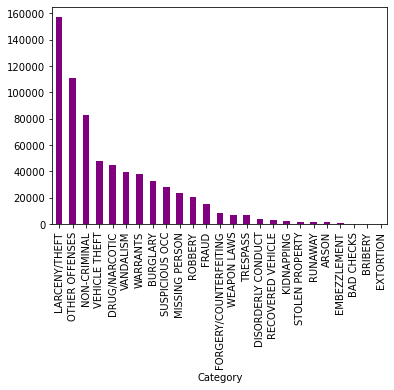

In [12]:
data_police['Category'].value_counts().plot(kind='bar', color='purple')

In [13]:
# Data Transformation : Split Date Time into Date - Time
data_police["Dates"] = pd.to_datetime(data_police["Dates"])

# Extraction des composants temporels utiles
data_police["Year"] = data_police["Dates"].dt.year
data_police["Month"] = data_police["Dates"].dt.month
data_police["Day"] = data_police["Dates"].dt.day
data_police["Hour"] = data_police["Dates"].dt.hour
data_police["Weekday"] = data_police["Dates"].dt.day_name()

# Vérification après transformation
data_police.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,Latitude (Y),Longitude (X),Year,Month,Day,Hour,Weekday
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,Wednesday
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,Wednesday
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,13,23,Wednesday
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,13,23,Wednesday
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,13,23,Wednesday


In [14]:
summary = {
    "Nombre total de crimes": data_police.shape[0],
    "Nombre de catégories uniques": data_police["Category"].nunique(),
    "Nombre de districts de police": data_police["PdDistrict"].nunique(),
    "Top 3 catégories de crimes": data_police["Category"].value_counts().head(3).to_dict(),
    "Top 3 districts avec le plus de crimes": data_police["PdDistrict"].value_counts().head(3).to_dict(),
    "Heure avec le plus de crimes": data_police["Hour"].mode()[0],
    "Jour avec le plus de crimes": data_police["Weekday"].mode()[0],
    "Type de résolution le plus fréquent": data_police["Resolution"].mode()[0],
}
summary

{'Nombre total de crimes': 680826,
 'Nombre de catégories uniques': 25,
 'Nombre de districts de police': 10,
 'Top 3 catégories de crimes': {'LARCENY/THEFT': 157238,
  'OTHER OFFENSES': 110857,
  'NON-CRIMINAL': 83204},
 'Top 3 districts avec le plus de crimes': {'SOUTHERN': 124373,
  'MISSION': 89453,
  'NORTHERN': 82154},
 'Heure avec le plus de crimes': 18,
 'Jour avec le plus de crimes': 'Friday',
 'Type de résolution le plus fréquent': 'NONE'}

In [15]:
data_police.describe()

,Dates,Latitude (Y),Longitude (X),Year,Month,Day,Hour
count,680826,680826.000000,680826.000000,680826.000000,680826.000000,680826.000000,680826.000000
mean,2009-03-12 14:34:43.951318272,-122.422852,37.771560,2008.701767,6.436667,15.571424,13.515796
min,2003-01-06 00:01:00,-122.513642,37.707879,2003.000000,1.000000,1.000000,0.000000
25%,2005-12-29 09:48:30,-122.433532,37.752837,2005.000000,3.000000,8.000000,9.000000
50%,2009-03-03 18:05:30,-122.416517,37.775421,2009.000000,6.000000,16.000000,14.000000
75%,2012-06-13 22:00:00,-122.406843,37.784464,2012.000000,9.000000,23.000000,19.000000
max,2015-05-13 23:53:00,-120.500000,90.000000,2015.000000,12.000000,31.000000,23.000000
std,NaN,0.030744,0.470065,3.641452,3.430312,8.778417,6.446162


C:\Users\hamdi\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


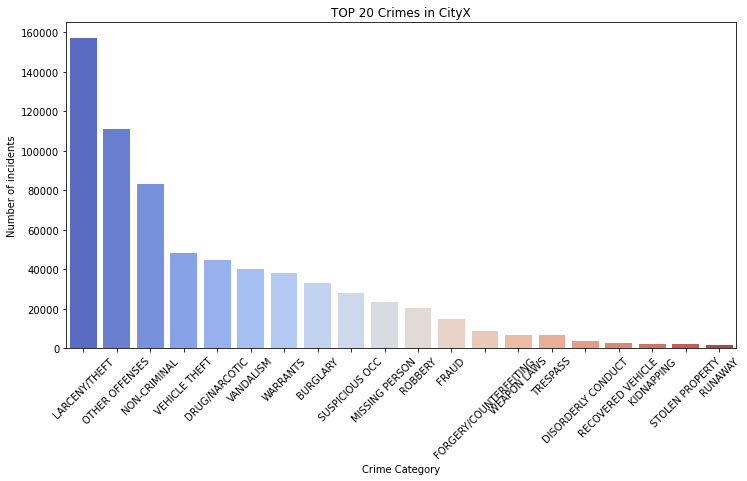

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données (si ce n'est pas encore fait)
# data_police = pd.read_csv("nom_du_fichier.csv", parse_dates=["Dates"])

# Compter les occurrences de chaque catégorie de crime
crime_counts = data_police["Category"].value_counts()

# Sélectionner les 10 catégories les plus fréquentes
top_crimes = crime_counts.head(20)

# Tracer le graphique
plt.figure(figsize=(12, 6))
sns.barplot(x=top_crimes.index, y=top_crimes.values, palette="coolwarm")

#  Personnalisation du graphique
plt.xticks(rotation=45)
plt.xlabel("Crime Category")
plt.ylabel("Number of incidents")
plt.title("TOP 20 Crimes in CityX")

# 5️⃣ Afficher le graphique
plt.show()



<AxesSubplot:xlabel='Resolution'>

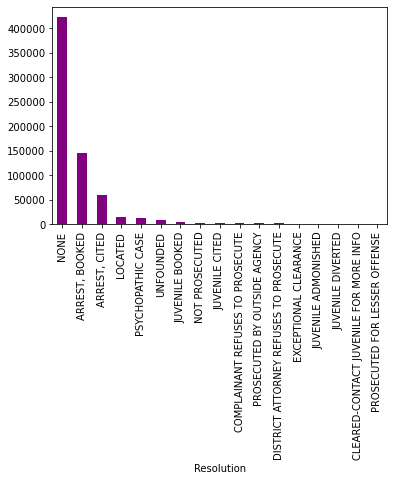

In [17]:
data_police['Resolution'].value_counts().plot(kind='bar', color='purple')

<AxesSubplot:xlabel='Year'>

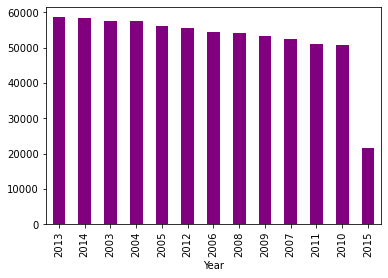

In [18]:
data_police['Year'].value_counts().plot(kind='bar', color='purple')

<AxesSubplot:xlabel='Month'>

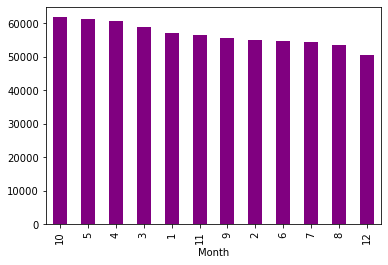

In [19]:
data_police['Month'].value_counts().plot(kind='bar', color='purple')

<AxesSubplot:xlabel='Hour'>

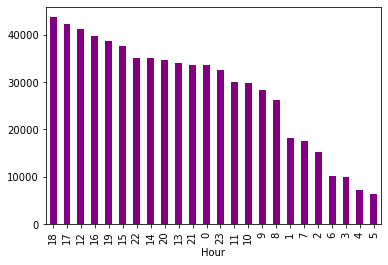

In [20]:
data_police['Hour'].value_counts().plot(kind='bar', color='purple')

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger les données
data = pd.read_csv("Competition_Dataset.csv")

# Créer la figure
plt.figure(figsize=(10, 8))

# Hexbin plot
hb = plt.hexbin(
    x=data["Latitude (Y)"],
    y=data["Longitude (X)"],
    # Ajuste la résolution de la grille (augmenter pour plus de détails)
    gridsize=50,
    cmap="Blues",  # Palette de couleurs
    mincnt=1  # Ignore les cellules vides
)

# Ajouter une barre de couleur
plt.colorbar(hb, label="Nombre de crimes")

# Ajuster les axes
plt.xlim(-122.5, -122.25)
plt.ylim(15, 40)

# Ajouter des labels
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("Répartition des crimes en grille hexagonale")

# Afficher le graphique
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'Competition_Dataset.csv'